In [19]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [20]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import numpy as np
from scipy.signal import detrend
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
resDir = Path("../results")
dataDir = Path("../data")

In [22]:
filname = Path("subj2.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [23]:
MEGdet = TVDNDetect(Ymat=MEG, saveDir="../results", dataType="MEG", fName="subj2", r=8, kappa=2.95, freq=60)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj2',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.95,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 8}


## Run the Main Function

In [24]:
MEGdet()

### Check the current results

In [25]:
print(MEGdet)

+-------------+----------------+--------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE         | Rank |
+-------------+----------------+--------------------+------+
|      0      |       []       | 1.1304837764327116 |  8   |
+-------------+----------------+--------------------+------+


## Tuning the kappa parameters

In [26]:
kappas = np.linspace(2.5, 3, 100)
kappas = np.linspace(2.15,3.05, 10)
MEGdet.TuningKappa(kappas)

### Then we  can check the best kappa parameters w.r.t mean square errors

In [27]:
print("The optimal kappas are:", MEGdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", MEGdet.optKappaOptNumChg)
print("The optimal number of change point is:", MEGdet.optNumChg)

The optimal kappas are: 2.9499999999999997
The optimal number of change point under the range of kappa we speicified is: 12
The optimal number of change point is: 13


###  Update the estimated change point set based on optimal kappa

You can also specify the number of change points you want via providing the augment `numChg`, then the `UpdateEcpts` will update the current estimated change point set accordingly.

In such case, the `PlotXXX` function will plot the curves under the number of change point you provided

In [28]:
MEGdet.UpdateEcpts(numChg=12)
MEGdet.UpdateEcpts()

### Check the results after updating

In [29]:
print(MEGdet)

+-------------+---------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                               Estiamted CPTs                              |        MSE         | Rank |
+-------------+---------------------------------------------------------------------------+--------------------+------+
|      12     | [ 184.  527. 1047. 1220. 1523. 1781. 2084. 2365. 2697. 2936. 3107. 3384.] | 0.4562687551109299 |  8   |
+-------------+---------------------------------------------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

 You may also specify the `saveFigPath` to save the figure


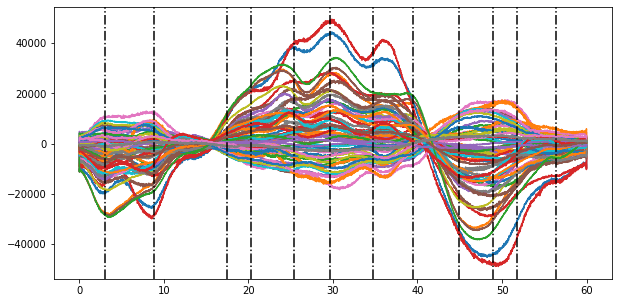

In [30]:
MEGdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure
 
 You should specify the subsets of sequences you want to plot via `idxs` argument

The plot indices are [44 36 59 16  2].


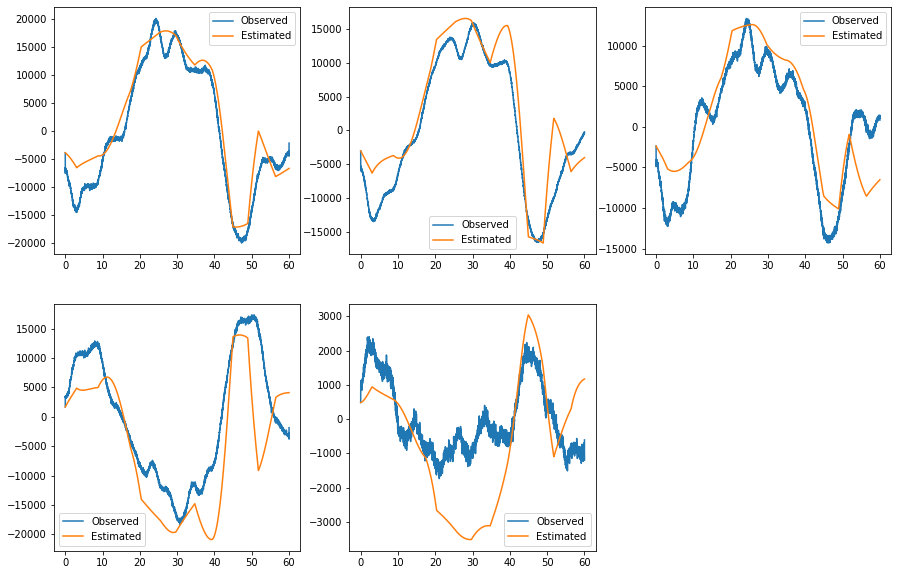

In [31]:
MEGdet.PlotRecCurve(saveFigPath=None)

### Detrend comparison

In [32]:
nYmat = MEGdet.nYmat
d, _ = nYmat.shape
denYmat = detrend(nYmat)
detrendRecX = detrend(MEGdet.RecResCur.EstXmatReal)

In [33]:
#diff = denYmat - detrendRecX
#errs2 = np.sum(diff**2, axis=1)/np.sum(denYmat**2, axis=1)
#errs = np.sqrt(errs2)
#argidxs = np.argsort(errs)
#qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
#idxs = argidxs[qidxs]
idxs = [44, 36, 59, 16,  2]

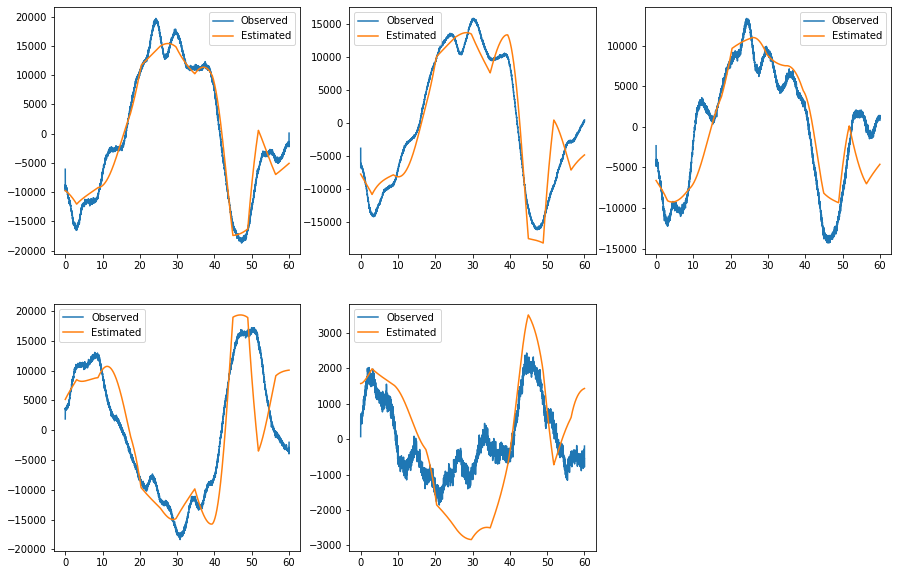

In [34]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(MEGdet.ptime, denYmat[idx, :], label="Observed")
    plt.plot(MEGdet.ptime, detrendRecX[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure

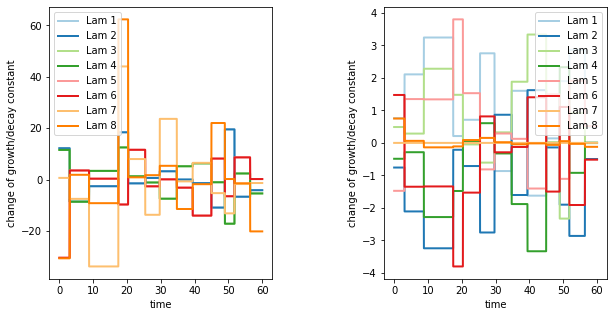

In [35]:
MEGdet.PlotEigenCurve()

### Results when number of changes is 0

In [36]:
MEGdet.UpdateEcpts(numChg=0)

In [37]:
print(MEGdet)

+-------------+----------------+--------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE         | Rank |
+-------------+----------------+--------------------+------+
|      0      |       []       | 1.1304837764327116 |  8   |
+-------------+----------------+--------------------+------+


The plot indices are [ 7 63  3 21 66].


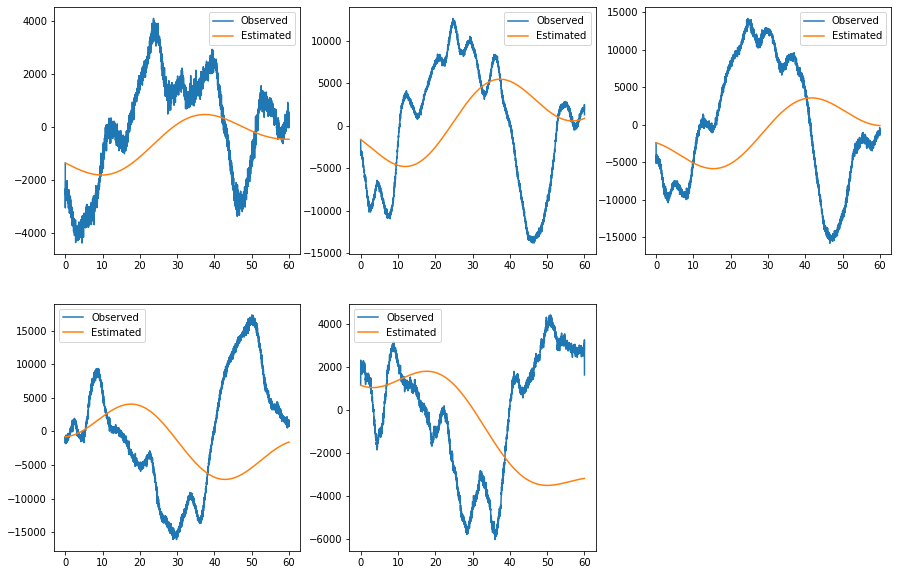

In [38]:
MEGdet.PlotRecCurve(saveFigPath=None)